In [1]:
import sys
sys.path.append('/home/wanduialbert/bicep/code/instruments/hp8753c')
import reso_fit as rf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

In [63]:
MHz = 1e6
A = 1
phi = 0
D = 0
f0 = 300 *MHz
f = np.r_[299.5:300.5:10000j]*MHz
# x = (f-f0)/f0
dQr = 1./12000
dQe = 1./24000

In [86]:
eps = (-0.5 + 0.5j*3**0.5)
def model_analytic(f, f0, A, phi, D, dQr, dQe_re, dQe_im, a):
    f0 = f0 * 1e6
    cable_phase = np.exp(2.j*pi*(1e-6*D*(f-f0)+phi))
    dQe = dQe_re + 1.j*dQe_im
    x0 = (f - f0)/f0
    y0 = x0/dQr
    k2 = np.sqrt((y0**3/27 + y0/12 + a/8)**2 - (y0**2/9 - 1/12)**3, dtype=np.complex128)
    k1 = (np.power(a/8 + y0/12 + k2 + y0**3/27, 1./3, dtype=np.complex128)).real
    y = (y0/3 + (y0**2/9 - 1/12)/k1 + k1).real
    x = y*dQr
    s21 = A*cable_phase*(1. - (dQe)/(dQr + 2.j*x))
    return s21

In [65]:
a_values = np.array([0, 0.6, 0.8, 1.0, 3.0, 5.0, 12.0])

[1.4997656 -0.01976655j 1.49951548-0.01976359j 1.49926536-0.01976062j
 1.49901524-0.01975765j 1.49876512-0.01975468j 1.498515  -0.01975171j
 1.49826488-0.01974874j 1.49801476-0.01974576j 1.49776464-0.01974278j
 1.49751452-0.01973981j]
[0.25046881+1.37936601e-14j 0.250469  -1.68656673e-14j
 0.25046918+2.96118601e-14j 0.25046937-1.68649576e-14j
 0.25046956+1.37588266e-14j 0.25046975+1.37501242e-14j
 0.25046994-2.08163959e-15j 0.25047012+1.37327267e-14j
 0.25047031-1.68631614e-14j 0.2504705 +1.37153388e-14j]
[1.4997656 +0.01976655j 1.49951548+0.01976359j 1.49926536+0.01976062j
 1.49901524+0.01975765j 1.49876512+0.01975468j 1.498515  +0.01975171j
 1.49826488+0.01974874j 1.49801476+0.01974576j 1.49776464+0.01974278j
 1.49751452+0.01973981j]


/home/wanduialbert/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


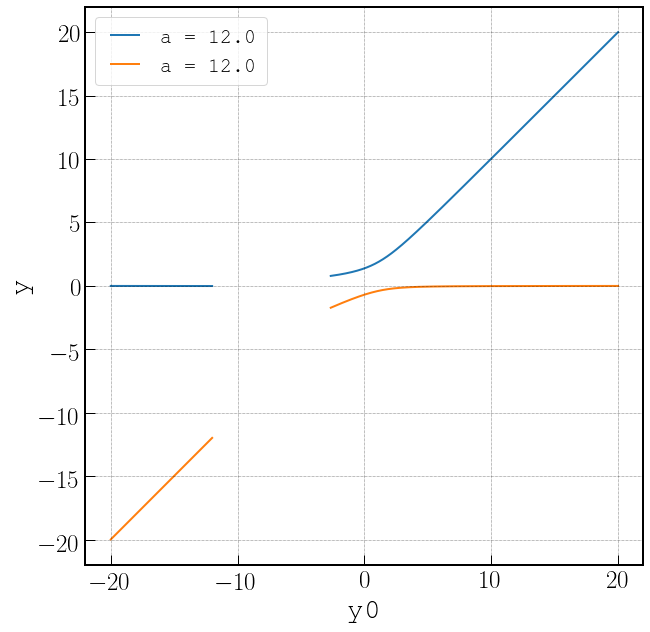

In [93]:
x0 = (f - f0)/f0
y0 = x0/dQr
fig, ax = plt.subplots(figsize=(10,10))
for a in a_values[6:]:
    k2 = np.sqrt((y0**3/27 + y0/12 + a/8)**2 - (y0**2/9 - 1/12)**3, dtype=np.complex128)
    k1 = (np.power(a/8 + y0/12 + k2 + y0**3/27, 1./3, dtype=np.complex128))
    y1 = (y0/3 + (y0**2/9 - 1/12)/k1 + k1)
    y2 = (y0/3 + (y0**2/9 - 1/12)/eps/k1 + k1*eps)
    y3 = (y0/3 + (y0**2/9 - 1/12)/eps**2/k1 + k1*eps**2)
    print (((y1-y0)*(1 + y1**2)/a)[:10])
    print (((y2-y0)*(1 + y2**2)/a)[:10])
    print (((y3-y0)*(1 + y3**2)/a)[:10])
    ax.plot(y0, y1.real, label='a = {0:1.1f}'.format(a))
    ax.plot(y0, y2.real, label='a = {0:1.1f}'.format(a))

ax.set_xlabel(r'y0')
ax.set_ylabel(r'y')
ax.grid(which='both')
ax.axis('tight')
ax.legend(loc='best');

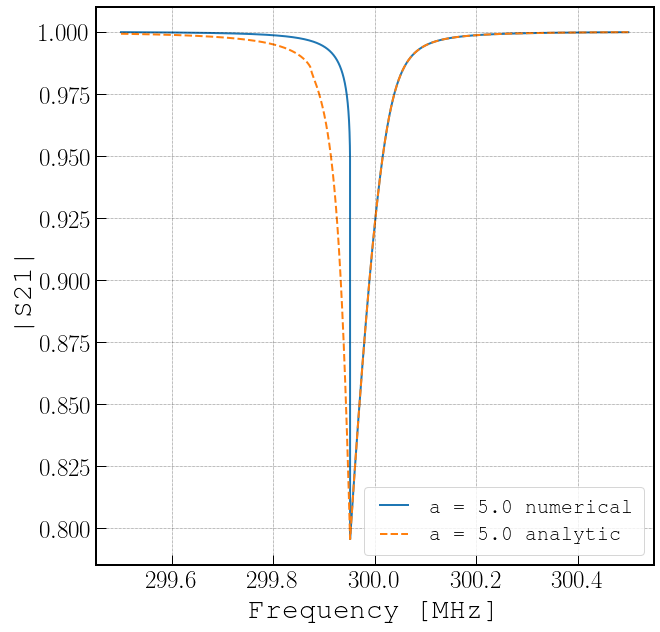

In [88]:
fig, ax = plt.subplots(figsize=(10,10))
for a in a_values[5:6]:
    S21 = rf.complex_of_real(rf.model_nl(f,f0/MHz,A,phi,D,dQr,dQe,0, a))
    S21_an = model_analytic(f,f0/MHz,A,phi,D,dQr,dQe,0, a)
    ax.plot(f/MHz, np.abs(S21), label="a = {0:1.1f} numerical".format(a))
    ax.plot(f/MHz, np.abs(S21_an),ls='dashed',label="a = {0:1.1f} analytic".format(a))

ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'|S21|')
ax.grid(which='both')
ax.axis('tight')
ax.legend(loc='best');

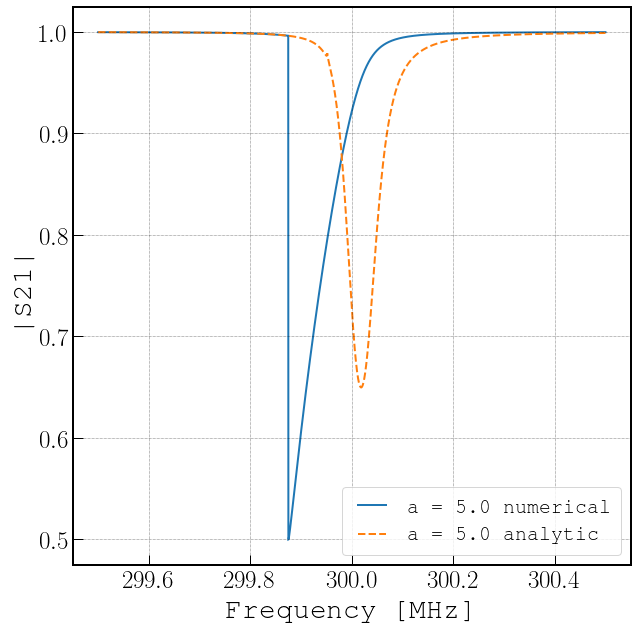

In [83]:
a_values = np.array([0, 0.6, 0.8, 1.0, 3.0, 5.0, 12.0])
fig, ax = plt.subplots(figsize=(10,10))
for a in a_values[5:6]:
    S21 = rf.complex_of_real(rf.model_nl(f[::-1],f0/MHz,A,phi,D,dQr,dQe,0, a))[::-1]
    S21_an = model_analytic(f,f0/MHz,A,phi,D,dQr,dQe,0, a)
    ax.plot(f/MHz, np.abs(S21), label="a = {0:1.1f} numerical".format(a))
    ax.plot(f/MHz, np.abs(S21_an),ls='dashed',label="a = {0:1.1f} analytic".format(a))

ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'|S21|')
ax.grid(which='both')
ax.axis('tight')
ax.legend(loc='best');

In [62]:
x0

array([ 998332.33333333,  998332.6667    ,  998333.00006667, ...,
       1001664.99993333, 1001665.3333    , 1001665.66666667])